Toronto Bicycle Theft Dataset: [Toronto Police Services](http://data.torontopolice.on.ca/datasets/bicycle-thefts)

Toronto Spatial Dataset: [Toronto Open Data](https://open.toronto.ca/dataset/neighbourhoods/)

In [2]:
# read Geojson file
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime as dt
import time
# WORK_PATH = "/Users/fangzeqiang/Desktop/SDSV-T2/CASA0006-DSSS/Assessment/"

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# supported by StackOverflow https://stackoverflow.com/questions/27835619/urllib-and-ssl-certificate-verify-failed-error

# read the data
# This reading operation might take 25s because the size of it is 25MB 
t0 = time.time()
url = "https://raw.githubusercontent.com/fang-zeqiang/CASA0006_DSSS/main/Dataset/Bicycle_Thefts.geojson"
print('Loading data from ', url)
df = gpd.read_file(url)
print('time taken', time.time()-t0, 'second')
# df.info()
df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Loading data from  https://raw.githubusercontent.com/fang-zeqiang/CASA0006_DSSS/main/Dataset/Bicycle_Thefts.geojson
time taken 26.600428104400635 second


,OBJECTID,event_unique_id,Primary_Offence,Occurrence_Date,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,Occurrence_DayOfMonth,Occurrence_DayOfYear,Occurrence_Hour,...,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Longitude,Latitude,ObjectId2,geometry
0,17744,GO-20179016397,THEFT UNDER,2017-10-03T04:00:00+00:00,2017,October,Tuesday,3,276,14,...,ESCAPE 2,OT,7,BLK,700.0,STOLEN,-79.506560,43.648427,1,POINT (-79.50656 43.64843)
1,17759,GO-20172033056,THEFT UNDER - BICYCLE,2017-11-08T05:00:00+00:00,2017,November,Wednesday,8,312,3,...,None,TO,1,BLK,1100.0,RECOVERED,-79.504849,43.654623,2,POINT (-79.50485 43.65462)
2,17906,GO-20189030822,THEFT UNDER - BICYCLE,2018-09-14T04:00:00+00:00,2018,September,Friday,14,257,9,...,CROSSTRAIL,MT,24,BLK,904.0,STOLEN,-79.511709,43.648253,3,POINT (-79.51171 43.64825)
3,17962,GO-2015804467,THEFT UNDER,2015-05-07T04:00:00+00:00,2015,May,Thursday,7,127,18,...,None,TO,10,BLKDGR,400.0,STOLEN,-79.511709,43.648253,4,POINT (-79.51171 43.64825)
4,17963,GO-20159002781,THEFT UNDER,2015-05-16T04:00:00+00:00,2015,May,Saturday,16,136,12,...,None,MT,6,RED,600.0,STOLEN,-79.511327,43.647364,5,POINT (-79.51133 43.64736)


---
[Data Input](##4.1-Data-Input) |
[Data Pre-processing](#4.2-Data-Pre-processing) |
[Data Preparation](#4.3-Data-Preparation) |
[Data Preparation](#4.4-Descriptive-Statistics)

## 4.2 Data Pre-processing

For find valuable information, the target attributes are selected. Then the data cleaning process is given to this filtered DataFrame, which can help to find the missing value precentage in the dataset. Under this circumstance, it can be descided which columns need to be dropped or remain. In this bicycle theft dataset, the `Cost_of_Bike` remains because of its further value in finding potential relationship behind the dataset. It should be noticed that the `Hood_ID` contains noise value e.g. 'NSA' and should be cleaned and transformed into integer format before continuing the further data processing such as merging with geo-dataset

In [4]:
# Pick the orriented varribles before exploration data analysis
df = df[['event_unique_id', 'Primary_Offence', 'Occurrence_Date',
       'Occurrence_Year', 'Occurrence_Month', 'Occurrence_DayOfWeek',
       'Occurrence_DayOfMonth', 'Occurrence_DayOfYear', 'Occurrence_Hour',
       'Division', 'City', 'Hood_ID', 'NeighbourhoodName', 'Location_Type',
       'Premises_Type', 'Bike_Make', 'Bike_Model', 'Bike_Type', 'Bike_Speed',
       'Bike_Colour', 'Cost_of_Bike', 'Status','Longitude', 'Latitude']]

# Data cleaning
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

# Drop the rows which have null value
df = df.dropna()

# drop the 'NSA' value 
# Transform the Hood_ID's value into int32 value
df = df.drop(df[df.Hood_ID == 'NSA'].index)
df.Hood_ID.astype('int32').dtypes

                       Total   Percent
Bike_Model              9620  0.376237
Bike_Colour             2061  0.080605
Cost_of_Bike            1744  0.068208
Latitude                   0  0.000000
Division                   0  0.000000
Primary_Offence            0  0.000000
Occurrence_Date            0  0.000000
Occurrence_Year            0  0.000000
Occurrence_Month           0  0.000000
Occurrence_DayOfWeek       0  0.000000
Occurrence_DayOfMonth      0  0.000000
Occurrence_DayOfYear       0  0.000000
Occurrence_Hour            0  0.000000
Hood_ID                    0  0.000000
City                       0  0.000000
Longitude                  0  0.000000
NeighbourhoodName          0  0.000000
Location_Type              0  0.000000
Premises_Type              0  0.000000
Bike_Make                  0  0.000000
Bike_Type                  0  0.000000
Bike_Speed                 0  0.000000
Status                     0  0.000000
event_unique_id            0  0.000000


dtype('int32')

To inspect all the numeric attributes in the dataset, the descriptive statistics are executed as given coding process below. Some findings from this processing:

- It is clear that cleaned dataset has 14530 rows. 
- The average cost of bike is 1067 bigger than its median(700).
- The speed of bike does not seem to be much different, which may cause clusters in subsequent


In [5]:
# check the numeric columns and descriptive statistics
import numpy as np
print(df.describe(include = [np.number]))

       Occurrence_Year  Occurrence_DayOfMonth  Occurrence_DayOfYear  \
count     14530.000000           14530.000000          14530.000000   
mean       2017.139023              15.635237            200.980592   
std           1.960326               8.555314             77.026686   
min        2010.000000               1.000000              1.000000   
25%        2016.000000               8.000000            151.000000   
50%        2017.000000              16.000000            203.000000   
75%        2019.000000              23.000000            257.000000   
max        2020.000000              31.000000            366.000000   

       Occurrence_Hour    Bike_Speed  Cost_of_Bike     Longitude      Latitude  
count     14530.000000  14530.000000  14530.000000  14530.000000  14530.000000  
mean         13.385891     15.132209   1067.966758    -79.395992     43.670924  
std           6.440467     10.061826   1557.083388      0.053836      0.035947  
min           0.000000      0.000000

---
[Data Input](##4.1-Data-Input) |
[Data Pre-processing](#4.2-Data-Pre-processing) |
[Data Preparation](#4.3-Data-Preparation) |
[Data Preparation](#4.4-Descriptive-Statistics)

## 4.3 Data Preparation

For clustering and spatial analysis, the spatial dataset importing and clustering raw data in numeric format are required. The overview of the distribution of clustering data will be presented before executing the DB-SCAN and K-means clustering analysis.

Loading data from  https://raw.githubusercontent.com/fang-zeqiang/CASA0006_DSSS/main/Dataset/Bicycle_Thefts.geojson
time taken 1.622744083404541 second


<AxesSubplot:>

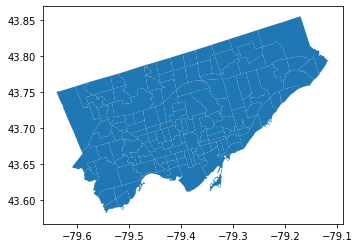

In [6]:
# Read the Boundaries of City of Toronto Neighbourhoods.
import time

# This process may take 3 seconds,
t1 = time.time()
url_geo = "https://raw.githubusercontent.com/fang-zeqiang/CASA0006_DSSS/main/Dataset/Neighbourhoods.geojson"
print('Loading data from ', url)
gdf = gpd.read_file(url_geo)
print('time taken', time.time()-t1, 'second')

gdf.plot()

There is a varriable called `AREA_SHORT_CODE` which is the same as `Hood_ID` in the bicycle dataframe. As discussing in the Introduction section, bicycle theft data will be explored in neighbourhoods of Toronto. This is the key of merging these two dataset.

In [27]:
gdf.columns

Index(['_id', 'AREA_ID', 'AREA_ATTR_ID', 'PARENT_AREA_ID', 'AREA_SHORT_CODE',
       'AREA_LONG_CODE', 'AREA_NAME', 'AREA_DESC', 'X', 'Y', 'LONGITUDE',
       'LATITUDE', 'OBJECTID', 'Shape__Area', 'Shape__Length',
       'CLASSIFICATION', 'CLASSIFICATION_CODE', 'geometry'],
      dtype='object')

In [9]:
# dfc means df copy version
dfc = df.copy()
dfc.Hood_ID.astype('int32')
print(gdf.AREA_SHORT_CODE.unique())
print(dfc.Hood_ID.unique())
# we can see the different types between these two DataFrame

[ 96  95 109  64 103 130  53  26   6 124  46 116  83  30  21  98 100 121
  74 134  87  47 104  35   1 136  43  40  70  85 139  57 140  65   2  76
  34  42 117  81  91  25 113  11  32  41 111  59   5 138 119  20 128  84
  61 106 129  90 115   9  28  69 102  48   8  66  36  24  79  31  78  58
  23  45  80  18 112  82  39  52 137  86  54   7  60 122 127  72  44 110
  73 135  17 105  33  92  12  29 132  19 114  13  49  89  93 123 120  75
  68  62  15  77  50 108  71  14 131 125  67 107  88  99   4  55   3  63
 118  16 101  10  38  27  56  94  97 126 133  22  37  51]
['15' '16' '14' '17' '1' '2' '7' '8' '11' '3' '4' '5' '6' '12' '13' '9'
 '10' '25' '26' '27' '28' '29' '30' '31' '18' '19' '20' '21' '22' '23'
 '24' '40' '41' '45' '42' '37' '39' '43' '36' '44' '32' '34' '35' '38'
 '46' '47' '48' '33' '57' '58' '59' '51' '56' '52' '53' '54' '55' '49'
 '50' '63' '64' '65' '60' '61' '62' '70' '67' '69' '66' '68' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '81' '80' '82' '85' '83' '84' '88'
 '86

Before merging by neighbourhoods, this studying focus more on these three numeric variables in below table. And these attributes will be calculated by the below cod. The descriptive statistics presented below can help us understand how to scale these three value. For example, lower than 955(median) cost of bike might represent that the bike is cheap while higher than 1194(75% quantile)one might mean that the bike is expensive.

|Variables|Definition|
|:---:|---:|
|`Cost_of_Bike`| Cost of Bike|
|`Bike_Speed`|Speed of Bike|
|`Frequency of Theft Bike`| Frequency of bike theft happening in a specific neighbourbood|

In [8]:
# Group by Hood_ID and return the mean of Cost_of_Bike in the group.
a = pd.DataFrame(dfc.groupby('Hood_ID')['Cost_of_Bike'].mean())
b = pd.DataFrame(dfc.groupby('Hood_ID')['Bike_Speed'].mean())
c = pd.DataFrame(dfc.groupby('Hood_ID')['event_unique_id'].count())
# change the columns' name
c.rename(columns={'event_unique_id':'Freq'},inplace=True)

# Then we should merge these three attributes' values
temp_1 = a.join(b)
temp_2 = temp_1.join(c)
dfm = temp_2.copy()
dfm.describe()

,Cost_of_Bike,Bike_Speed,Freq
count,140.000000,140.000000,140.000000
mean,1011.725985,14.914925,103.785714
std,404.624440,2.860085,212.819300
min,338.250000,5.200000,2.000000
25%,798.768772,13.419192,14.000000
50%,955.953698,15.095490,31.500000
75%,1194.012791,16.616099,87.250000
max,3084.043478,21.760000,1614.000000


In [8]:
# it is of importance to transform your value into int32 type before merging
dfm['AREA_SHORT_CODE'] = dfm.index.astype('int32')
dfm.head()

,Cost_of_Bike,Bike_Speed,Freq,AREA_SHORT_CODE
Hood_ID,,,,
1,750.851852,16.481481,27,1
10,1258.307692,13.538462,13,10
100,1097.687500,19.468750,96,100
101,1017.619048,17.317460,63,101
102,1495.602941,15.955882,68,102


In [11]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 1 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cost_of_Bike     140 non-null    float64
 1   Bike_Speed       140 non-null    float64
 2   Freq             140 non-null    int64  
 3   AREA_SHORT_CODE  140 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 10.5+ KB


In [29]:
dfm.corr()

,Cost_of_Bike,Bike_Speed,Freq
Cost_of_Bike,1.000000,0.017208,0.068271
Bike_Speed,0.017208,1.000000,0.037316
Freq,0.068271,0.037316,1.000000


Then inspecting the merged dataframe(three variables), we can find there is less likely to find relationship among these attributes according to above correlation index. Also, it is obvious to see the distribution in this merged DataFrame `dfm` by introducing the `seaborn` exploratory data analysis method.

---
[Data Input](##4.1-Data-Input) |
[Data Pre-processing](#4.2-Data-Pre-processing) |
[Data Preparation](#4.3-Data-Preparation) |
[Data Preparation](#4.4-Descriptive-Statistics)

## 4.4 Descriptive Statistics

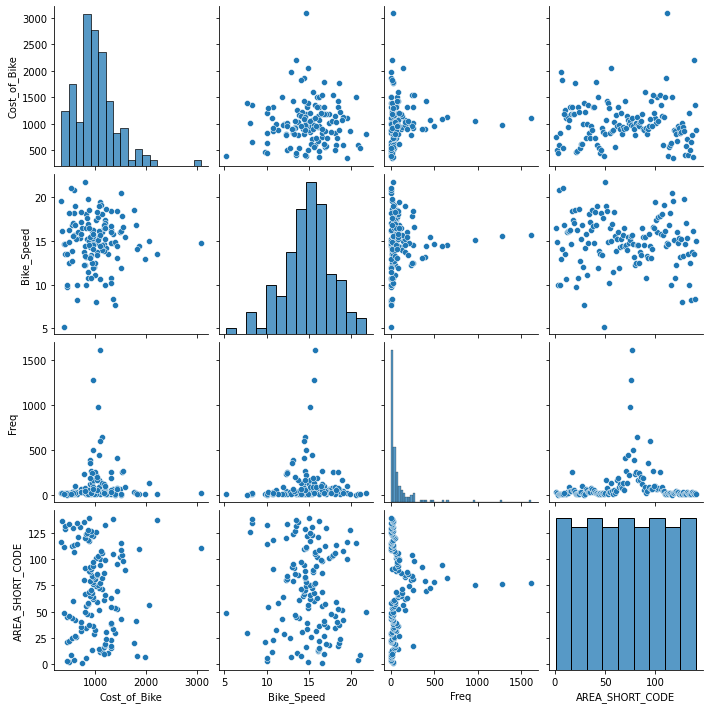

In [10]:
import seaborn as sns
sns.pairplot(dfm)

<AxesSubplot:>

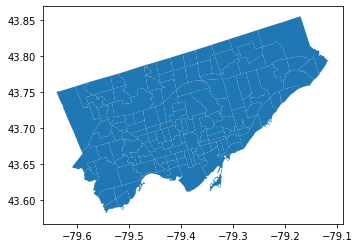

In [12]:
# merge with original case
# dfmg = dfm with geo info
dfmg = pd.merge(gdf,dfm,left_on='AREA_SHORT_CODE',right_on='AREA_SHORT_CODE',how='inner').reset_index()
dfmg.plot()

In [14]:
dfmg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   index                140 non-null    int64   
 1   _id                  140 non-null    int64   
 2   AREA_ID              140 non-null    int64   
 3   AREA_ATTR_ID         140 non-null    int64   
 4   PARENT_AREA_ID       0 non-null      object  
 5   AREA_SHORT_CODE      140 non-null    int64   
 6   AREA_LONG_CODE       140 non-null    int64   
 7   AREA_NAME            140 non-null    object  
 8   AREA_DESC            140 non-null    object  
 9   X                    0 non-null      object  
 10  Y                    0 non-null      object  
 11  LONGITUDE            0 non-null      object  
 12  LATITUDE             0 non-null      object  
 13  OBJECTID             140 non-null    int64   
 14  Shape__Area          140 non-null    float64 
 15  Shape__Length  

In [16]:
# export the .geojson
dfmg.to_file("/Users/fangzeqiang/Github/Digital-Viz-City-Transformations/Bicycle-Thefts-Risk/Dataset/dfmg_before_cluster.json", driver="GeoJSON")

The above map is complete after two DataFrames are merged which can indicate that there is no data missing in this merging process. In the next step, the analysis of maximum and minimum value analysis is given below to some insights before preparing the clustering analysis.

In [12]:
# We can inspect the min and max in these three value in toronto
# ppd.head(5)
print('Frequency of Theft Cases')
print(dfmg[dfmg.Freq.isin([dfmg.Freq.max(), dfmg.Freq.min()])][['index','AREA_SHORT_CODE','AREA_NAME','Freq']])
print('\n'+'Cost of Theft Bikes')
print(dfmg[dfmg.Cost_of_Bike.isin([dfmg.Cost_of_Bike.max(), dfmg.Cost_of_Bike.min()])][['index','AREA_SHORT_CODE','AREA_NAME','Cost_of_Bike']])
print('\n'+'Speed of Theft Bikes')
print(dfmg[dfmg.Bike_Speed.isin([dfmg.Bike_Speed.max(), dfmg.Bike_Speed.min()])][['index','AREA_SHORT_CODE','AREA_NAME','Bike_Speed']])

Frequency of Theft Cases
     index  AREA_SHORT_CODE                               AREA_NAME  Freq
11      11              116                           Steeles (116)     2
111    111               77  Waterfront Communities-The Island (77)  1614
124    124                3        Thistletown-Beaumond Heights (3)     2

Cost of Theft Bikes
    index  AREA_SHORT_CODE                AREA_NAME  Cost_of_Bike
38     38              117         L'Amoreaux (117)    338.250000
46     46              111  Rockcliffe-Smythe (111)   3084.043478

Speed of Theft Bikes
     index  AREA_SHORT_CODE                   AREA_NAME  Bike_Speed
102    102               49  Bayview Woods-Steeles (49)        5.20
112    112               50       Newtonbrook East (50)       21.76


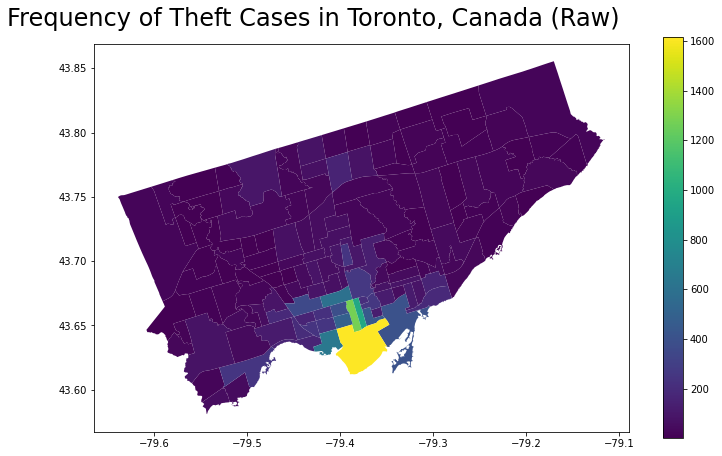

In [19]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

tfont = {'fontname':'DejaVu Sans', 'horizontalalignment':'left'}
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
dfmg.plot(column='Freq', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle(f"Frequency of Theft Cases in Toronto, Canada (Raw)", x=0.025, size=24, **tfont);
plt.savefig('Frequency_of_Theft_Cases.png', dpi=300)

In [20]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

# to_cluster = dfmg[['AREA_SHORT_CODE','Cost_of_Bike','Bike_Speed','Freq']].set_index('AREA_SHORT_CODE').copy()
to_cluster = dfmg[['AREA_SHORT_CODE','Cost_of_Bike','Freq']].set_index('AREA_SHORT_CODE').copy()
to_cluster.head()

# normnise the value
normed = to_cluster.copy()
for c in to_cluster.columns.values:
    normed[c] = rs.fit_transform(to_cluster[c].values.reshape(-1,1))
normed.head()

,Cost_of_Bike,Freq
AREA_SHORT_CODE,,
96,0.498111,0.153500
95,0.137279,2.306590
109,0.571615,-0.100287
64,0.009200,0.218993
103,0.101972,0.161686


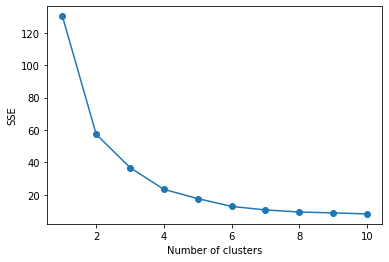

In [21]:
# calculate SSE for a range of number of cluster
from sklearn.cluster import KMeans

list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(normed)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In this section, it is found that condition `k_cluster = 3` has better result of clustering than condition `k_cluster = 4` after applying the elbow method to optimise the clustering parameter choosing.

Silhouette Score is :
0.5690500639040841


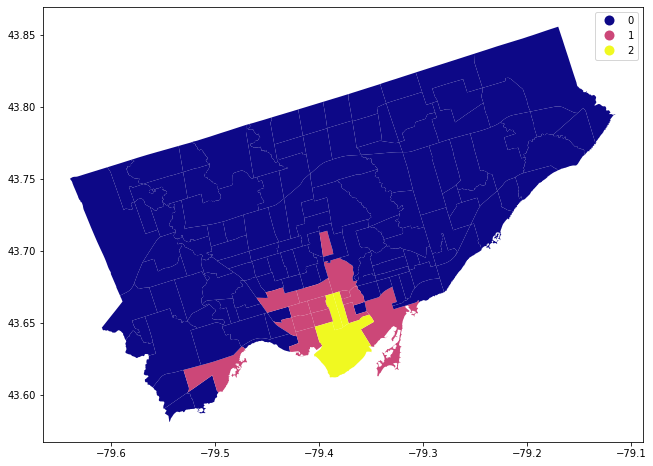

In [22]:
# re-run the k-means process
from sklearn.cluster import KMeans
k_cluster = 3
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)

dfmg['Kmeans_Cluster'] = kmeans_method.labels_
fig_kmeans_4 = dfmg.plot(column='Kmeans_Cluster', categorical=True, legend=True, figsize=(12,8),cmap = 'plasma');
from sklearn import metrics
print("Silhouette Score is :")
print(metrics.silhouette_score(normed, dfmg['Kmeans_Cluster']))

In [24]:
dfmg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   index                140 non-null    int64   
 1   _id                  140 non-null    int64   
 2   AREA_ID              140 non-null    int64   
 3   AREA_ATTR_ID         140 non-null    int64   
 4   PARENT_AREA_ID       0 non-null      object  
 5   AREA_SHORT_CODE      140 non-null    int64   
 6   AREA_LONG_CODE       140 non-null    int64   
 7   AREA_NAME            140 non-null    object  
 8   AREA_DESC            140 non-null    object  
 9   X                    0 non-null      object  
 10  Y                    0 non-null      object  
 11  LONGITUDE            0 non-null      object  
 12  LATITUDE             0 non-null      object  
 13  OBJECTID             140 non-null    int64   
 14  Shape__Area          140 non-null    float64 
 15  Shape__Length  

In [25]:
kmeans_label = pd.DataFrame(kmeans_method.labels_, columns = ['kmeans_label'])

# to_cluster_labeled = pd.concat([to_cluster, DB_label], axis = 1).dropna()

temp = to_cluster.join(kmeans_label)
to_cluster_labeled = temp.copy()
to_cluster_labeled.head()

summary_df_kmeans = \
    to_cluster_labeled[['Cost_of_Bike','Freq','kmeans_label']].groupby('kmeans_label')\
    .mean() \
    .round()

summary_df_kmeans['count'] = to_cluster_labeled.kmeans_label.value_counts()
summary_df_kmeans
# summary_df.drop()

,Cost_of_Bike,Freq,count
kmeans_label,,,
0.0,991.0,95.0,121
1.0,1093.0,197.0,15
2.0,1466.0,34.0,3


In [21]:
temp = dfmg.join(kmeans_label)
dfmg_labeled = temp.copy()
dfmg_labeled.head()

,index,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,...,Shape__Area,Shape__Length,CLASSIFICATION,CLASSIFICATION_CODE,geometry,Cost_of_Bike,Bike_Speed,Freq,Kmeans_Cluster,kmeans_label
0,0,11481,2480141,26005521,None,96,96,Casa Loma (96),Casa Loma (96),None,...,3.678385e+06,8214.176485,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",1433.028986,13.072464,69,0,0
1,1,11482,2480140,26005520,None,95,95,Annex (95),Annex (95),None,...,5.337192e+06,10513.883143,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",1087.435294,14.431933,595,1,1
2,2,11483,2480139,26005519,None,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),None,...,2.955857e+06,6849.911724,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",1503.428571,16.142857,7,0,0
3,3,11484,2480064,26005444,None,64,64,Woodbine Corridor (64),Woodbine Corridor (64),None,...,3.052518e+06,7512.966773,None,None,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",964.764706,11.882353,85,0,0
4,4,11485,2480063,26005443,None,103,103,Lawrence Park South (103),Lawrence Park South (103),None,...,6.211341e+06,13530.370002,None,None,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",1053.619718,17.732394,71,0,0


以上是各个类簇的中心点，代表了各个类簇的特点，具体的分析如下

如k均值聚类图（k = 3）所示，k-均值聚类分析还生成了3个聚类。 三个集群中包含的社区根据距市中心的距离分层分布。 例如，蓝色（群集0）中的社区不靠近市中心，而群集2（黄色区域）包含多伦多市中心中的大多数社区。

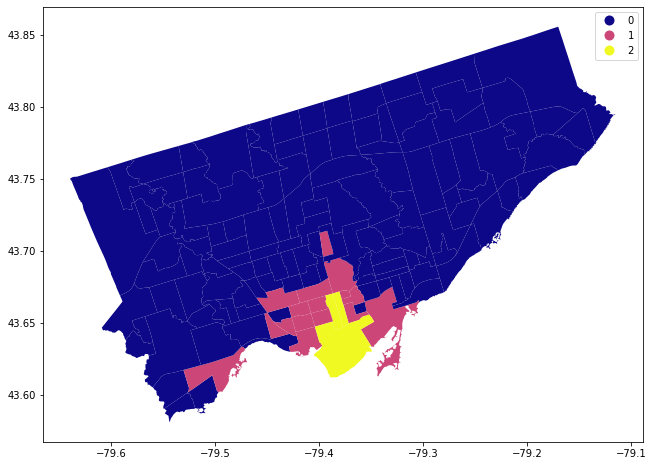

In [23]:
fig_kmeans_4 = dfmg.plot(column='Kmeans_Cluster', categorical=True, legend=True, figsize=(12,8),cmap = 'plasma');

In [24]:
summary_df_kmeans

,Cost_of_Bike,Bike_Speed,Freq,count
kmeans_label,,,,
0.0,991.0,15.0,93.0,120
1.0,1088.0,15.0,201.0,16
2.0,1466.0,16.0,34.0,3


# DB-SCAN

Silhouette Score is :
0.20079133022911996


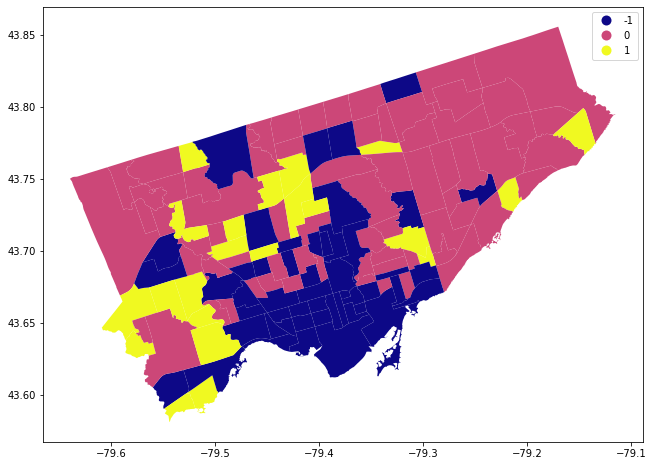

In [61]:
from math import ceil
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN

minPts = 6
epsilon = 0.1
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(normed)

clusters = dbsc.labels_

dfmg['DBSCAN_Cluster'] = clusters
dfmg.plot(column='DBSCAN_Cluster', categorical=True, legend=True, figsize=(12,8), cmap = 'plasma');

from sklearn import metrics
print("Silhouette Score is :")
print(metrics.silhouette_score(normed, clusters))

# dfmg.to_csv("/Users/fangzeqiang/Github/Digital-Viz-City-Transformations/Bicycle-Thefts-Risk/Dataset/dfmg.csv")

# DB_label = pd.DataFrame(dbsc.labels_, columns = ['dbsc_label'])

# to_cluster_labeled = pd.concat([to_cluster, DB_label], axis = 1).dropna()


#temp = dfmg_labeled.join(DB_label)
#dfmg_labeled_labeled = temp.copy()
#dfmg_labeled_labeled.to_csv("/Users/fangzeqiang/Github/Digital-Viz-City-Transformations/Bicycle-Thefts-Risk/Dataset/dfmg_labeled_labeled.csv")


In [63]:
# dfmg.head()
# dfmg.to_csv("/Users/fangzeqiang/Github/Digital-Viz-City-Transformations/Bicycle-Thefts-Risk/Dataset/dfmg.csv")
# export the .csv
dfmg.to_file("/Users/fangzeqiang/Github/Digital-Viz-City-Transformations/Bicycle-Thefts-Risk/Dataset/dfmg_after_cluster.geojson", driver="GeoJSON")

In [64]:
df.head()

,event_unique_id,Primary_Offence,Occurrence_Date,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,Occurrence_DayOfMonth,Occurrence_DayOfYear,Occurrence_Hour,Division,...,Premises_Type,Bike_Make,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Longitude,Latitude
0,GO-20179016397,THEFT UNDER,2017-10-03T04:00:00+00:00,2017,October,Tuesday,3,276,14,D22,...,Outside,GI,ESCAPE 2,OT,7,BLK,700.0,STOLEN,-79.506560,43.648427
2,GO-20189030822,THEFT UNDER - BICYCLE,2018-09-14T04:00:00+00:00,2018,September,Friday,14,257,9,D22,...,Transit,OT,CROSSTRAIL,MT,24,BLK,904.0,STOLEN,-79.511709,43.648253
5,GO-20151861057,THEFT UNDER,2015-09-01T04:00:00+00:00,2015,September,Tuesday,1,244,0,D22,...,Outside,OTHER,UNK,RC,18,TRQ,100.0,STOLEN,-79.519607,43.649404
6,GO-20169001537,THEFT UNDER,2016-02-18T05:00:00+00:00,2016,February,Thursday,18,49,9,D22,...,Transit,NO,SASQUATCH,MT,18,WHI,0.0,STOLEN,-79.511709,43.648253
9,GO-20149003203,THEFT UNDER,2014-05-07T04:00:00+00:00,2014,May,Wednesday,7,127,18,D22,...,Outside,UK,HARDROCK,MT,24,ONG,550.0,STOLEN,-79.511327,43.647364


In [70]:
dfmg.head()

,index,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,...,Shape__Area,Shape__Length,CLASSIFICATION,CLASSIFICATION_CODE,geometry,Cost_of_Bike,Bike_Speed,Freq,Kmeans_Cluster,DBSCAN_Cluster
0,0,11481,2480141,26005521,None,96,96,Casa Loma (96),Casa Loma (96),None,...,3.678385e+06,8214.176485,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",1433.028986,13.072464,69,0,-1
1,1,11482,2480140,26005520,None,95,95,Annex (95),Annex (95),None,...,5.337192e+06,10513.883143,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",1087.435294,14.431933,595,1,-1
2,2,11483,2480139,26005519,None,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),None,...,2.955857e+06,6849.911724,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",1503.428571,16.142857,7,0,-1
3,3,11484,2480064,26005444,None,64,64,Woodbine Corridor (64),Woodbine Corridor (64),None,...,3.052518e+06,7512.966773,None,None,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",964.764706,11.882353,85,0,0
4,4,11485,2480063,26005443,None,103,103,Lawrence Park South (103),Lawrence Park South (103),None,...,6.211341e+06,13530.370002,None,None,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",1053.619718,17.732394,71,0,0


---

# Labels获取

这是为了在mapbox上打上neighbourhoods标签
需要得到每个Neighbourhoods的名称即

In [37]:
# read Geojson file
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime as dt
import time
# WORK_PATH = "/Users/fangzeqiang/Desktop/SDSV-T2/CASA0006-DSSS/Assessment/"

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# supported by StackOverflow https://stackoverflow.com/questions/27835619/urllib-and-ssl-certificate-verify-failed-error

# read the data
# This reading operation might take 25s because the size of it is 25MB 
t0 = time.time()
url = "https://raw.githubusercontent.com/fang-zeqiang/CASA0006_DSSS/main/Dataset/Bicycle_Thefts.geojson"
print('Loading data from ', url)
df = gpd.read_file(url)
print('time taken', time.time()-t0, 'second')
# df.info()
df.head()

Loading data from  https://raw.githubusercontent.com/fang-zeqiang/CASA0006_DSSS/main/Dataset/Bicycle_Thefts.geojson
time taken 26.3761568069458 second


,OBJECTID,event_unique_id,Primary_Offence,Occurrence_Date,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,Occurrence_DayOfMonth,Occurrence_DayOfYear,Occurrence_Hour,...,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Longitude,Latitude,ObjectId2,geometry
0,17744,GO-20179016397,THEFT UNDER,2017-10-03T04:00:00+00:00,2017,October,Tuesday,3,276,14,...,ESCAPE 2,OT,7,BLK,700.0,STOLEN,-79.506560,43.648427,1,POINT (-79.50656 43.64843)
1,17759,GO-20172033056,THEFT UNDER - BICYCLE,2017-11-08T05:00:00+00:00,2017,November,Wednesday,8,312,3,...,None,TO,1,BLK,1100.0,RECOVERED,-79.504849,43.654623,2,POINT (-79.50485 43.65462)
2,17906,GO-20189030822,THEFT UNDER - BICYCLE,2018-09-14T04:00:00+00:00,2018,September,Friday,14,257,9,...,CROSSTRAIL,MT,24,BLK,904.0,STOLEN,-79.511709,43.648253,3,POINT (-79.51171 43.64825)
3,17962,GO-2015804467,THEFT UNDER,2015-05-07T04:00:00+00:00,2015,May,Thursday,7,127,18,...,None,TO,10,BLKDGR,400.0,STOLEN,-79.511709,43.648253,4,POINT (-79.51171 43.64825)
4,17963,GO-20159002781,THEFT UNDER,2015-05-16T04:00:00+00:00,2015,May,Saturday,16,136,12,...,None,MT,6,RED,600.0,STOLEN,-79.511327,43.647364,5,POINT (-79.51133 43.64736)


In [47]:
# Pick the orriented varribles before exploration data analysis
df = df[['event_unique_id', 'Primary_Offence', 'Occurrence_Date',
       'Occurrence_Year', 'Occurrence_Month', 'Occurrence_DayOfWeek',
       'Occurrence_DayOfMonth', 'Occurrence_DayOfYear', 'Occurrence_Hour',
       'Division', 'City', 'Hood_ID', 'NeighbourhoodName', 'Location_Type',
       'Premises_Type', 'Bike_Make', 'Bike_Model', 'Bike_Type', 'Bike_Speed',
       'Bike_Colour', 'Cost_of_Bike', 'Status','Longitude', 'Latitude']]

# Data cleaning
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

# Drop the rows which have null value
df = df.dropna()

# drop the 'NSA' value 
# Transform the Hood_ID's value into int32 value
df = df.drop(df[df.Hood_ID == 'NSA'].index)
df.Hood_ID.astype('int32').dtypes

                       Total  Percent
Latitude                   0      0.0
Longitude                  0      0.0
Primary_Offence            0      0.0
Occurrence_Date            0      0.0
Occurrence_Year            0      0.0
Occurrence_Month           0      0.0
Occurrence_DayOfWeek       0      0.0
Occurrence_DayOfMonth      0      0.0
Occurrence_DayOfYear       0      0.0
Occurrence_Hour            0      0.0
Division                   0      0.0
City                       0      0.0
Hood_ID                    0      0.0
NeighbourhoodName          0      0.0
Location_Type              0      0.0
Premises_Type              0      0.0
Bike_Make                  0      0.0
Bike_Model                 0      0.0
Bike_Type                  0      0.0
Bike_Speed                 0      0.0
Bike_Colour                0      0.0
Cost_of_Bike               0      0.0
Status                     0      0.0
event_unique_id            0      0.0


dtype('int32')

Loading data from  https://raw.githubusercontent.com/fang-zeqiang/CASA0006_DSSS/main/Dataset/Neighbourhoods.geojson
time taken 1.3392558097839355 second


<AxesSubplot:>

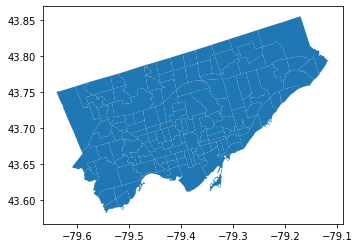

In [48]:
# Read the Boundaries of City of Toronto Neighbourhoods.
import time

# This process may take 3 seconds,
t1 = time.time()
url_geo = "https://raw.githubusercontent.com/fang-zeqiang/CASA0006_DSSS/main/Dataset/Neighbourhoods.geojson"
print('Loading data from ', url_geo)
gdf = gpd.read_file(url_geo)
print('time taken', time.time()-t1, 'second')

gdf.plot()

In [49]:
# Group by Hood_ID and return the mean of Cost_of_Bike in the group.
a = pd.DataFrame(dfc.groupby('Hood_ID')['Cost_of_Bike'].mean())
b = pd.DataFrame(dfc.groupby('Hood_ID')['Bike_Speed'].mean())
c = pd.DataFrame(dfc.groupby('Hood_ID')['event_unique_id'].count())
d = pd.DataFrame(dfc.groupby('Hood_ID')['Latitude'].mean())
e = pd.DataFrame(dfc.groupby('Hood_ID')['Longitude'].mean())
f = pd.DataFrame(dfc.groupby('Hood_ID')['NeighbourhoodName'])

# change the columns' name
c.rename(columns={'event_unique_id':'Freq'},inplace=True)

# Then we should merge these three attributes' values
temp_1 = a.join(b)
temp_2 = temp_1.join(c)
temp_3 = temp_2.join(d)
temp_4 = temp_3.join(e)
temp_5 = temp_4.join(f)
dfm = temp_5.copy()
# dfm.describe()

dfm['AREA_SHORT_CODE'] = dfm.index.astype('int32')
dfm.head()

,Cost_of_Bike,Bike_Speed,Freq,Latitude,Longitude,0,1,AREA_SHORT_CODE
Hood_ID,,,,,,,,
1,750.851852,16.481481,27,43.728515,-79.600849,NaN,NaN,1
10,1258.307692,13.538462,13,43.663479,-79.538104,NaN,NaN,10
100,1097.687500,19.468750,96,43.706413,-79.402053,NaN,NaN,100
101,1017.619048,17.317460,63,43.691226,-79.413434,NaN,NaN,101
102,1495.602941,15.955882,68,43.702988,-79.431923,NaN,NaN,102


In [45]:
dfc['NeighbourhoodName']

0        Kingsway South (15)
2        Kingsway South (15)
5        Kingsway South (15)
6        Kingsway South (15)
9        Kingsway South (15)
                ...         
25557          Malvern (132)
25558          Malvern (132)
25564          Malvern (132)
25566          Malvern (132)
25568          Malvern (132)
Name: NeighbourhoodName, Length: 14530, dtype: object

<AxesSubplot:>

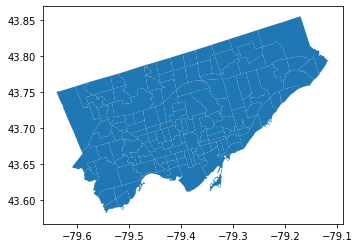

In [50]:
# merge with original case
# dfmg = dfm with geo info
dfmg = pd.merge(gdf,dfm,left_on='AREA_SHORT_CODE',right_on='AREA_SHORT_CODE',how='inner').reset_index()
dfmg.plot()

In [51]:
dfmg.head()

,index,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,...,CLASSIFICATION,CLASSIFICATION_CODE,geometry,Cost_of_Bike,Bike_Speed,Freq,Latitude,Longitude,0,1
0,0,11481,2480141,26005521,None,96,96,Casa Loma (96),Casa Loma (96),None,...,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",1433.028986,13.072464,69,43.680575,-79.407598,None,None
1,1,11482,2480140,26005520,None,95,95,Annex (95),Annex (95),None,...,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",1087.435294,14.431933,595,43.670308,-79.403154,None,None
2,2,11483,2480139,26005519,None,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),None,...,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",1503.428571,16.142857,7,43.689486,-79.452368,None,None
3,3,11484,2480064,26005444,None,64,64,Woodbine Corridor (64),Woodbine Corridor (64),None,...,None,None,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",964.764706,11.882353,85,43.677437,-79.315369,None,None
4,4,11485,2480063,26005443,None,103,103,Lawrence Park South (103),Lawrence Park South (103),None,...,None,None,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",1053.619718,17.732394,71,43.719226,-79.407831,None,None


In [59]:
dfmg = dfmg.drop(["index", "_id"], axis = 1)
# dfmg.AREA_SHORT_CODE.astype('str').dtypes

In [64]:
# rename the columns
# dfmg_id = dfmg.rename(columns={'AREA_SHORT_CODE': 'id'})
dfmg_id = dfmg.copy()

In [65]:
dfmg_id.head()

,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,...,CLASSIFICATION,CLASSIFICATION_CODE,geometry,Cost_of_Bike,Bike_Speed,Freq,Latitude,Longitude,0,1
0,2480141,26005521,None,96,96,Casa Loma (96),Casa Loma (96),None,None,None,...,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",1433.028986,13.072464,69,43.680575,-79.407598,None,None
1,2480140,26005520,None,95,95,Annex (95),Annex (95),None,None,None,...,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",1087.435294,14.431933,595,43.670308,-79.403154,None,None
2,2480139,26005519,None,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),None,None,None,...,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",1503.428571,16.142857,7,43.689486,-79.452368,None,None
3,2480064,26005444,None,64,64,Woodbine Corridor (64),Woodbine Corridor (64),None,None,None,...,None,None,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",964.764706,11.882353,85,43.677437,-79.315369,None,None
4,2480063,26005443,None,103,103,Lawrence Park South (103),Lawrence Park South (103),None,None,None,...,None,None,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",1053.619718,17.732394,71,43.719226,-79.407831,None,None


In [67]:
import geopandas as gpd
dfmg_id.to_file("/Users/fangzeqiang/Github/Digital-Viz-City-Transformations/Bicycle-Thefts-Risk/Code/neighbourhoods_for_mapbox_with_id.geojson",driver = "GeoJSON")

AttributeError: 'int' object has no attribute 'encode'